# Метрики

## 1) Регрессия

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay)


In [2]:
# 1. Создание синтетических данных с помощью sklearn
X, y, coef = make_regression(
    n_samples=100,      # количество примеров
    n_features=1,       # число признаков
    noise=20,           # уровень шума
    bias=10,            # смещение (константа)
    coef=True,          # возвращать коэффициенты
    random_state=42
)

# 2. Сдвигаем target y, чтобы все значения были >= 0 (для MSLE)
y = y - y.min() + 1  # добавляем, чтобы минимум стал равен 1

# 2. Обучение простой линейной регрессии
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

### 1. Mean Squared Error (MSE) — средняя квадратичная ошибка

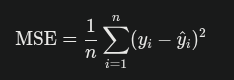

Графически: на диаграмме рассеяния с линией регрессии квадраты вертикальных отклонений от линии показывают вклад каждой точки в MSE

In [3]:
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 312.22


### 2. Mean Absolute Error (MAE) — средняя абсолютная ошибка  
Среднее абсолютное отклонение предсказаний от фактических значений:

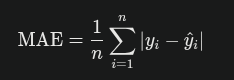  

Эта метрика более устойчива к выбросам, чем MSE.  
На графике видно, что для одинаковых точек отклонение измеряется как прямая вертикальная длина между точкой и линией предсказания

In [4]:
mae = mean_absolute_error(y, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 14.21


### 3. MedAE - Median Absolute Error

Похожа на MAE, но считает разницу не со средним, а с медианой, поэтому если в датасете есть выбросы - она менее чуствительна к ним

$MedAE = median(|y_1 - \hat{y}_1|, ..., |y_n - \hat{y}_n|)$

In [5]:
print("MedAE = ", median_absolute_error(y, y_pred))

MedAE =  12.833495436117985


### 4. Root Mean Squared Error (RMSE) — корень из MSE

возвращая ошибку в тех же единицах, что и целевая переменная, что облегчает интерпретацию

In [6]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 17.67


### 5. Коэффициент детерминации (R²) — показатель объясненной дисперсии

Показывает, какую долю дисперсии зависимой переменной объясняет модель:   

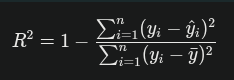 

Значения варьируются от −∞ до 1. Чем ближе к 1, тем лучше модель объясняет данные.

Графически — чем плотнее точки располагаются вокруг линии регрессии, тем выше R².

In [7]:
r2 = r2_score(y, y_pred)
print(f"R-squared (R²): {r2:.2f}")


R-squared (R²): 0.85


### 6. RMSELE - Root Mean Squared Log Error

Похож на RMSE, но считается через логарифм, что позволяет использовать его для предсказаний признака в **бОльшем** диапазоне, чем MSE

$RMSLE = \sqrt{\frac{1}{n}\sum^{n}_{i=1}((\log{\hat{y}_i + 1}) - (\log{y_i + 1}))^2}$  

Не работает с отрицательными значениями из-за логарифма

In [8]:
msle = mean_squared_log_error(y, y_pred)
print(f"Mean Squared Logarithmic Error: {msle:.4f}")


np.sqrt(mean_squared_log_error(y , y_pred))

Mean Squared Logarithmic Error: 0.0404


np.float64(0.20087981123921522)

### 7. MAPE - Mean Absolute Percentage Error

Похожа на MAE но считает в процентах, насколько возникла ошибка. Используется если нужно предсказать проценты, и среднее отлично от нуля.

$MAPE = \frac{1}{n}\sum_{i=1}^n|\frac{y_i - \hat{y}_i}{y_i}|\times100\%$

In [9]:
mape1 = mape(y , y_pred)

print(f"MAPE: {mape1:.2f}")

MAPE: 0.18


### 8. SMAPE - Symmetric Mean Absolute Percentage Error

Если попадаются нулевые значения - лучше ее, MAPE с нулями не работает.

$SMAPE = \frac{100\%}{n}\sum_{i=1}^n2\cdot\frac{|y_i - \hat{y}_i|}{|y_i| + |\hat{y}_i|}$

In [10]:
def smape(d, p):
    return 100/len(d) * np.sum(2 * np.abs(p - d) / (np.abs(d) + np.abs(p)))

smape(y , y_pred)

np.float64(13.389052008848074)

### Визуализации

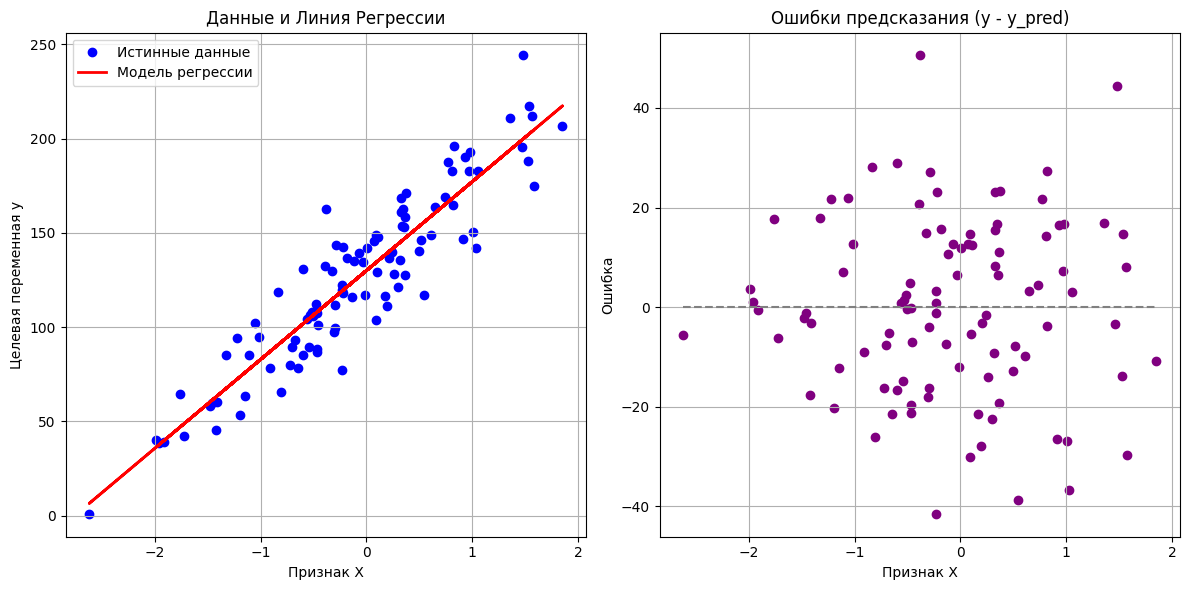

In [11]:

# 4. Визуализация данных и предсказаний
plt.figure(figsize=(12, 6))

# График: Истинные значения и линия регрессии
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', label='Истинные данные')
plt.plot(X, y_pred, color='red', linewidth=2, label='Модель регрессии')
plt.title('Данные и Линия Регрессии')
plt.xlabel('Признак X')
plt.ylabel('Целевая переменная y')
plt.legend()
plt.grid(True)

# График: Ошибки предсказания
plt.subplot(1, 2, 2)
errors = y - y_pred
plt.scatter(X, errors, color='purple')
plt.hlines(0, X.min(), X.max(), colors='gray', linestyles='dashed')
plt.title('Ошибки предсказания (y - y_pred)')
plt.xlabel('Признак X')
plt.ylabel('Ошибка')
plt.grid(True)

plt.tight_layout()
plt.show()


## 2) Классификация


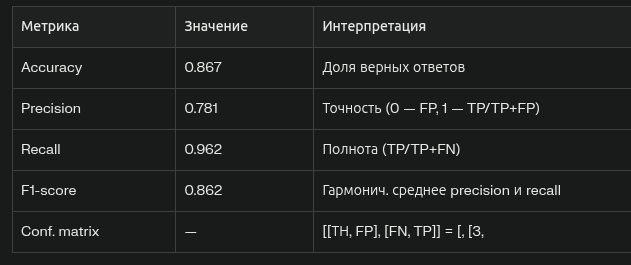  

In [12]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [13]:
# Шаг 1: Генерация синтетических данных
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, weights=[0.5, 0.5], random_state=42)

# Шаг 2: Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Шаг 3: Обучение модели
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

###  1. accuracy

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy:  {accuracy:.3f}')

Accuracy:  0.867


### 2. precision

In [15]:
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.3f}')

Precision: 0.781


### 3. recall

In [16]:
recall = recall_score(y_test, y_pred)
print(f'Recall:    {recall:.3f}')

Recall:    0.962


### 4.  F1-score


In [17]:
f1 = f1_score(y_test, y_pred)
print(f'F1-score:  {f1:.3f}')

F1-score:  0.862


### Confusion matrix

In [18]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[27  7]
 [ 1 25]]


Accuracy:  0.867
Precision: 0.781
Recall:    0.962
F1-score:  0.862


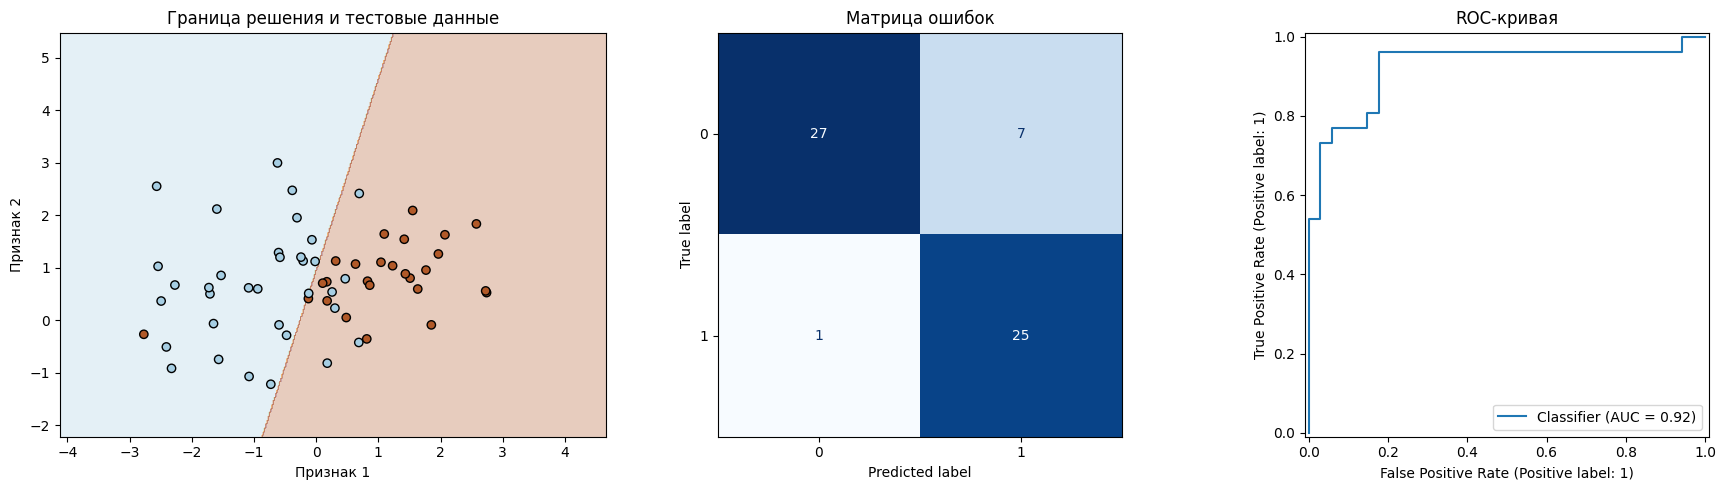

In [ ]:

y_proba = model.predict_proba(X_test)[:, 1]  # вероятности класса 1 для ROC

# 4. Считаем метрики
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy:  {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall:    {recall:.3f}')
print(f'F1-score:  {f1:.3f}')

# 5. Визуализация

plt.figure(figsize=(18, 5))

# 5.1 График с точками и границей решения
plt.subplot(1, 3, 1)
h = 0.02  # шаг сетки
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Paired)
plt.title('Граница решения и тестовые данные')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

# 5.2 Матрица ошибок
plt.subplot(1, 3, 2)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca(), colorbar=False)
plt.title('Матрица ошибок')

# 5.3 ROC-кривая
plt.subplot(1, 3, 3)
roc_disp = RocCurveDisplay.from_predictions(y_test, y_proba, ax=plt.gca())
plt.title('ROC-кривая')

plt.tight_layout()
plt.show()


#### Алгоритм построения ROC-AUC кривой
Пусть есть метки классов и вероятности принадлежности к классу 1  
```
y_test = [0, 0, 0, 1, 1, 1, 0, 1]
y_proba = [0.6, 0.1, 0.3, 0.6, 0.7, 0.8, 0.2, 0.2]
 
```

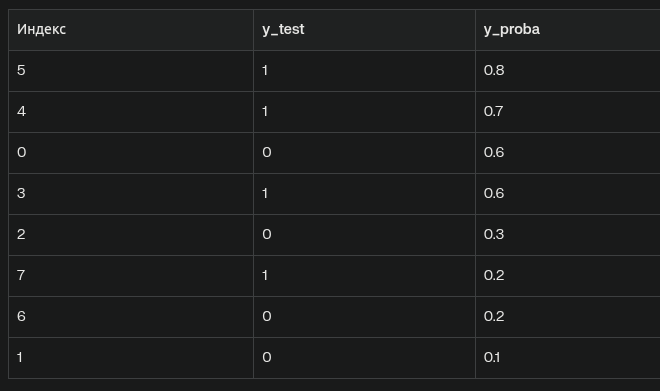 


Шаг 2. Считаем общее количество положительных (P) и отрицательных (N):
P = число единиц = 4 (индексы 3,4,5,7)

N = число нулей = 4 (индексы 0,1,2,6)

Шаг 3. Уникальные пороги — значения вероятностей по убыванию (добавим 1.0 для точки начала):
Пороги: [1.0 (точка начала), 0.8, 0.7, 0.6, 0.3, 0.2, 0.1, 0.0 (точка в конце)]

Правила классификации при пороге t:  
    Если score ≥ t — классифицируем как положительный (1), иначе отрицательный (0).  
Вычисляем TP, FP, FN, TN, а затем TPR и FPR для каждого порога:  

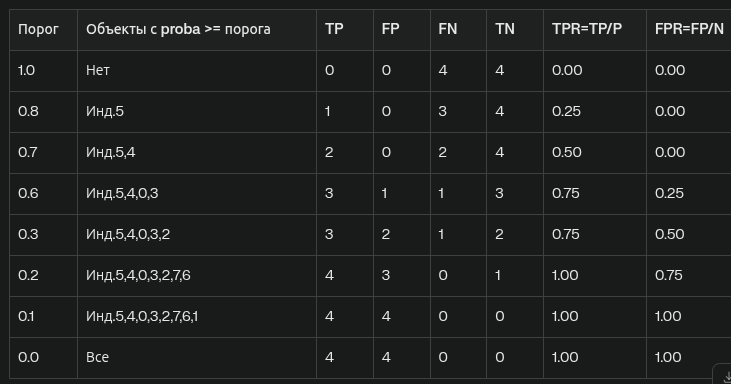
 
Добавляем точку начала (порог > максимума, никакие объекты не положительные, значит TPR=0, FPR=0):  

При пороге 1.0 никто не классифицирован положительным → TP=0, FP=0.  

При пороге 0.8 положительный класс присвоен индексу 5 (y=1) → TP=1, FP=0.  

При пороге 0.6 положительные — индексы 5,4,0,3, где индекс 0 — класс 0 → FP увеличился на 1.  

И так далее.  

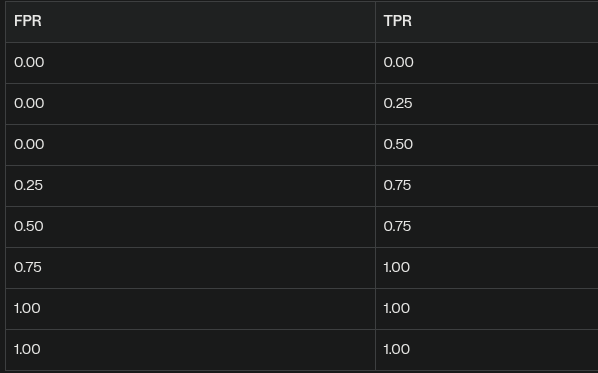 

Построение графика:  

По оси X откладываем False Positive Rate (FPR).  

По оси Y откладываем True Positive Rate (TPR).  

Соединяем точки в порядке возрастания FPR:  

(0,0) → (0,0.33) → (0,0.67) → (0,1) → (0.33,1) → (0.67,1) → (1,1)  


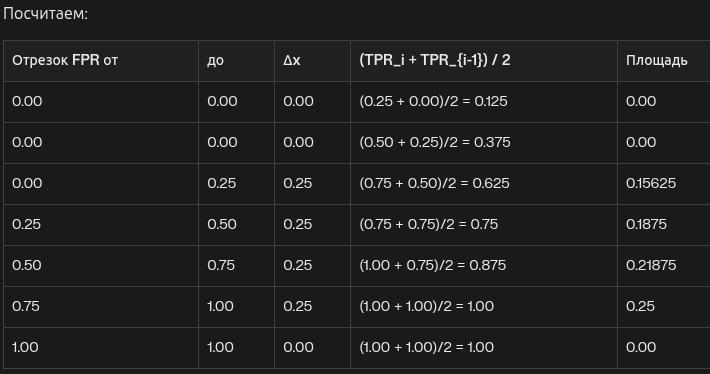  

Сумма площадей:  ` 0+0+0.15625+0.1875+0.21875+0.25+0=0.8125 `

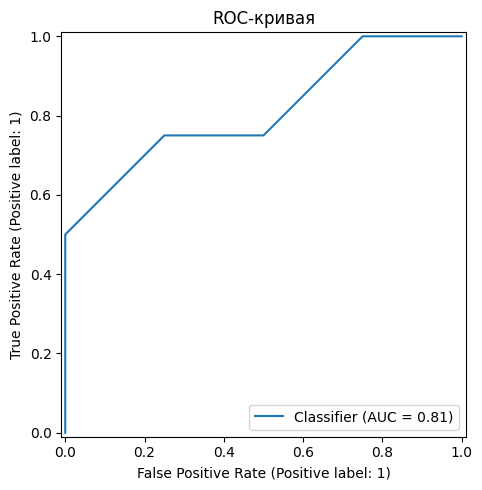

In [ ]:
# ПРИМЕР

y_test = [0, 0, 0, 1, 1, 1, 0, 1]  
y_proba = [0.6, 0.1, 0.3, 0.6, 0.7, 0.8, 0.2, 0.2] 

# 5. Визуализация

plt.figure(figsize=(18, 5))


# 5.3 ROC-кривая
roc_disp = RocCurveDisplay.from_predictions(y_test, y_proba, ax=plt.gca())
plt.title('ROC-кривая')

plt.tight_layout()
plt.show()

## 3) Метрики компьютерного зрения  
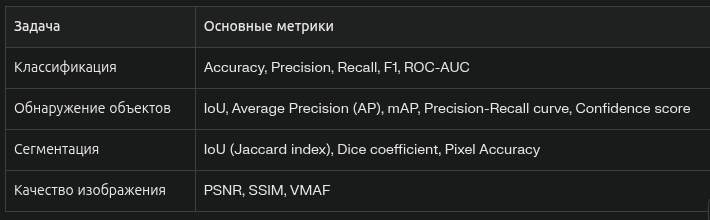 

### 1. Object Detection

In [1]:
def iou(boxA, boxB):
    # box = [x_min, y_min, x_max, y_max]
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    
    interArea = max(0, xB - xA) * max(0, yB - yA)
    
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
    
    iou = interArea / float(boxAArea + boxBArea - interArea)
    return iou

# Пример
pred_box = [50, 50, 150, 150]
true_box = [60, 60, 140, 140]

print("IoU:", iou(pred_box, true_box))


IoU: 0.64


### 2. Image Segmentation

In [2]:
import numpy as np

def iou_segmentation(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred).sum()
    union = np.logical_or(y_true, y_pred).sum()
    return intersection / union

def dice_coefficient(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred).sum()
    return 2 * intersection / (y_true.sum() + y_pred.sum())

# Пример масок (numpy boolean arrays)
mask_true = np.array([[1,1,0],[0,1,0],[0,0,1]], dtype=bool)
mask_pred = np.array([[1,0,0],[0,1,1],[0,0,1]], dtype=bool)

print("IoU (segmentation):", iou_segmentation(mask_true, mask_pred))
print("Dice Coefficient:", dice_coefficient(mask_true, mask_pred))


IoU (segmentation): 0.6
Dice Coefficient: 0.75


### 3. Image Quality Assessment

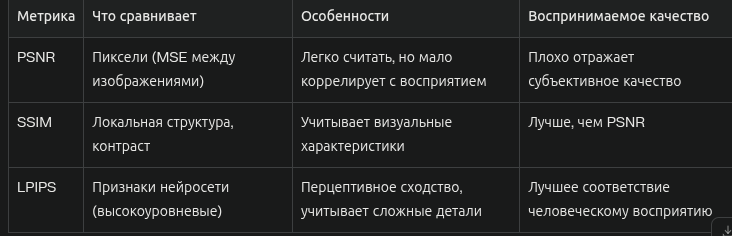 

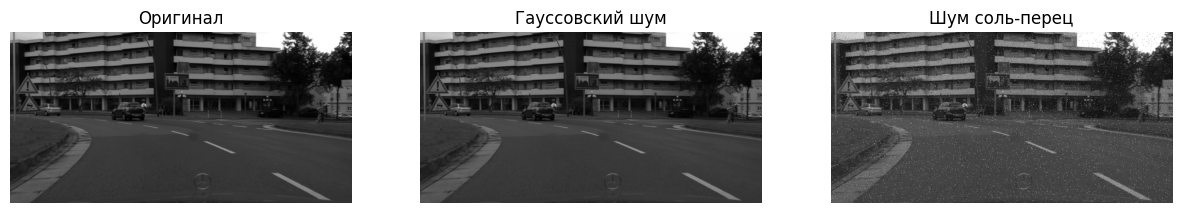

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('../../data/image/1.png', cv2.IMREAD_GRAYSCALE)

def add_gaussian_noise(image, mean=0, sigma=25):
    """Добавляет гауссовский шум."""
    gauss = np.random.normal(mean, sigma, image.shape).astype('float32')
    noisy = image.astype('float32') + gauss
    noisy = np.clip(noisy, 0, 255).astype('uint8')
    return noisy

def add_salt_and_pepper_noise(image, salt_prob=0.01, pepper_prob=0.01):
    """Добавляет шум типа соль-перец."""
    noisy = np.copy(image)
    total_pixels = image.size

    # Соль (белые пиксели)
    num_salt = np.ceil(salt_prob * total_pixels).astype(int)
    coords_salt = [np.random.randint(0, i, num_salt) for i in image.shape]
    noisy[coords_salt[0], coords_salt[1]] = 255

    # Перец (черные пиксели)
    num_pepper = np.ceil(pepper_prob * total_pixels).astype(int)
    coords_pepper = [np.random.randint(0, i, num_pepper) for i in image.shape]
    noisy[coords_pepper[0], coords_pepper[1]] = 0

    return noisy

# Добавим шумы
img_gauss = add_gaussian_noise(img1, mean=0, sigma=1)
img_sp = add_salt_and_pepper_noise(img1, salt_prob=0.01, pepper_prob=0.01)

# Визуализация для сравнения
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Оригинал')
plt.imshow(img1, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Гауссовский шум')
plt.imshow(img_gauss, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Шум соль-перец')
plt.imshow(img_sp, cmap='gray')
plt.axis('off')

plt.show()


In [22]:
import cv2
from skimage.metrics import structural_similarity as ssim
import numpy as np


# PSNR
psnr_value = cv2.PSNR(img_gauss, img1)
print("PSNR:", psnr_value)

# SSIM
ssim_value, ssim_map = ssim(img_gauss, img1, full=True)
print("SSIM:", ssim_value)


PSNR: 46.897135695438195
SSIM: 0.9889662853070564


In [23]:
# PSNR
psnr_value = cv2.PSNR(img_sp, img1)
print("PSNR:", psnr_value)

# SSIM
ssim_value, ssim_map = ssim(img_sp, img1, full=True)
print("SSIM:", ssim_value)


PSNR: 22.06046702227436
SSIM: 0.5815231490295805


In [34]:
import lpips
import torch
from PIL import Image
import torchvision.transforms as transforms
import numpy as np

# Создаем объект метрики LPIPS
loss_fn = lpips.LPIPS(net='alex')  # Можно выбрать 'alex', 'vgg' и др.

# Функция загрузки изображения в RGB и преобразования для LPIPS
def load_image(path):
    img = Image.open(path).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    img_t = transform(img).unsqueeze(0)
    return img_t

# Функция, которая добавляет лёгкие искажения: шум + небольшое изменение цветов
def add_color_noise(img_pil, noise_level=0.05, brightness_factor=1.1):
    # Преобразуем PIL Image в numpy массив в диапазоне [0,1]
    img_np = np.array(img_pil).astype(np.float32) / 255.0
    
    # Добавляем небольшой случайный шум к каждому каналу
    noise = np.random.normal(0, noise_level, img_np.shape).astype(np.float32)
    img_noisy = img_np + noise
    img_noisy = np.clip(img_noisy, 0, 1)
    
    # Увеличиваем яркость (простой множитель)
    img_noisy = np.clip(img_noisy * brightness_factor, 0, 1)
    
    # Обратно в PIL Image
    img_noisy_pil = Image.fromarray((img_noisy * 255).astype(np.uint8))
    return img_noisy_pil

# Загружаем исходное изображение
img1_pil = Image.open('../../data/image/1.png').convert('RGB')

# Создаём искажённую версию
img2_pil = add_color_noise(img1_pil, noise_level=0.5, brightness_factor=1.05)

# Преобразуем для LPIPS
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

img1_t = transform(img1_pil).unsqueeze(0)
img2_t = transform(img2_pil).unsqueeze(0)

# Вычисляем LPIPS
d = loss_fn(img1_t, img2_t)
print('LPIPS distance:', d.item())


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/maksim/develops/python/env1/lib/python3.12/site-packages/lpips/weights/v0.1/alex.pth
LPIPS distance: 0.10328063368797302
